# Class Statistics

Gather background data on classes, etc. for proposal.

In [41]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import os
# Set seed for reproducibility
import numpy as np
np.random.seed(290)

In [42]:
# Load names and proposed classes dataset
# Excel file "~/Box/INFO 290T Project/Names and Proposed Classes.xlsx"
names_and_proposed_classes = pd.read_excel('~/Box/INFO 290T Project/Names and Proposed Classes.xlsx')
names_and_proposed_classes

,Name,Class
0,AM General Hummer SUV 2000,SUV
1,Acura RL Sedan 2012,Sedan
2,Acura TL Sedan 2012,Sedan
3,Acura TL Type-S 2008,Sedan
4,Acura TSX Sedan 2012,Sedan
...,...,...
191,Volkswagen Beetle Hatchback 2012,Hatchback
192,Volvo C30 Hatchback 2012,Hatchback
193,Volvo 240 Sedan 1993,Sedan
194,Volvo XC90 SUV 2007,SUV


  Proposed Class  Original Classes (Make, Model, Year)
0          Sedan                                    51
1            SUV                                    37
2          Coupe                                    32
3    Convertible                                    26
4         Pickup                                    16
5      Hatchback                                    13
6          Wagon                                     7
7            Van                                     7
8        Minivan                                     6
9          Hatch                                     1


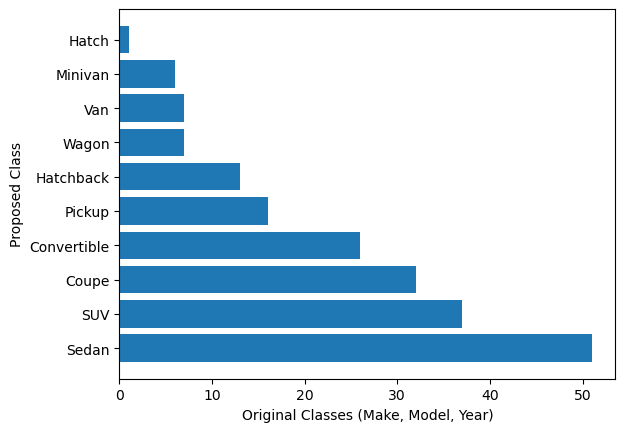

In [43]:
# Proposed classes and counts in original data
# Rename columns
proposed_classes = names_and_proposed_classes['Class'].value_counts().reset_index().rename(columns={'Class': 'Proposed Class', 'count': 'Original Classes (Make, Model, Year)'})
print(proposed_classes)

# Bar chart of counts by Class
# Horizontal bar chart
plt.barh(proposed_classes['Proposed Class'], proposed_classes['Original Classes (Make, Model, Year)'])
plt.xlabel('Original Classes (Make, Model, Year)')
plt.ylabel('Proposed Class')
plt.savefig('../Output/Original_Classes_by_Proposed_Class.png', bbox_inches='tight')

## Using Annotations Data for More Statistics

Images per category

In [44]:
# Bring in '~\Box\INFO 290T Project\Intermediate Data\cars_annos.xslx'
cars_annos = pd.read_excel('~/Box/INFO 290T Project/Intermediate Data/cars_annos.xlsx')
cars_annos

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test,class_name,im_path,filename_only
0,112,7,853,717,1,0,AM General Hummer SUV 2000,/Box/INFO 290T Project/Raw Data/Stanford Car D...,00001.jpg
1,48,24,441,202,1,0,AM General Hummer SUV 2000,/Box/INFO 290T Project/Raw Data/Stanford Car D...,00002.jpg
2,7,4,277,180,1,0,AM General Hummer SUV 2000,/Box/INFO 290T Project/Raw Data/Stanford Car D...,00003.jpg
3,33,50,197,150,1,0,AM General Hummer SUV 2000,/Box/INFO 290T Project/Raw Data/Stanford Car D...,00004.jpg
4,5,8,83,58,1,0,AM General Hummer SUV 2000,/Box/INFO 290T Project/Raw Data/Stanford Car D...,00005.jpg
...,...,...,...,...,...,...,...,...,...
16180,38,36,375,234,196,1,smart fortwo Convertible 2012,/Box/INFO 290T Project/Raw Data/Stanford Car D...,16181.jpg
16181,29,34,235,164,196,1,smart fortwo Convertible 2012,/Box/INFO 290T Project/Raw Data/Stanford Car D...,16182.jpg
16182,25,32,587,359,196,1,smart fortwo Convertible 2012,/Box/INFO 290T Project/Raw Data/Stanford Car D...,16183.jpg
16183,56,60,208,186,196,1,smart fortwo Convertible 2012,/Box/INFO 290T Project/Raw Data/Stanford Car D...,16184.jpg


In [45]:
# Merge on 'Name' in names_and_proposed_classes being class_name in cars_annos
# Should be same length as cars_annos
print('length of cars_annos:', len(cars_annos))
proposed_class_images = pd.merge(names_and_proposed_classes, cars_annos, left_on='Name', right_on='class_name', how='left')
proposed_class_images

length of cars_annos: 16185


,Name,Class,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test,class_name,im_path,filename_only
0,AM General Hummer SUV 2000,SUV,112,7,853,717,1,0,AM General Hummer SUV 2000,/Box/INFO 290T Project/Raw Data/Stanford Car D...,00001.jpg
1,AM General Hummer SUV 2000,SUV,48,24,441,202,1,0,AM General Hummer SUV 2000,/Box/INFO 290T Project/Raw Data/Stanford Car D...,00002.jpg
2,AM General Hummer SUV 2000,SUV,7,4,277,180,1,0,AM General Hummer SUV 2000,/Box/INFO 290T Project/Raw Data/Stanford Car D...,00003.jpg
3,AM General Hummer SUV 2000,SUV,33,50,197,150,1,0,AM General Hummer SUV 2000,/Box/INFO 290T Project/Raw Data/Stanford Car D...,00004.jpg
4,AM General Hummer SUV 2000,SUV,5,8,83,58,1,0,AM General Hummer SUV 2000,/Box/INFO 290T Project/Raw Data/Stanford Car D...,00005.jpg
...,...,...,...,...,...,...,...,...,...,...,...
16180,smart fortwo Convertible 2012,Convertible,38,36,375,234,196,1,smart fortwo Convertible 2012,/Box/INFO 290T Project/Raw Data/Stanford Car D...,16181.jpg
16181,smart fortwo Convertible 2012,Convertible,29,34,235,164,196,1,smart fortwo Convertible 2012,/Box/INFO 290T Project/Raw Data/Stanford Car D...,16182.jpg
16182,smart fortwo Convertible 2012,Convertible,25,32,587,359,196,1,smart fortwo Convertible 2012,/Box/INFO 290T Project/Raw Data/Stanford Car D...,16183.jpg
16183,smart fortwo Convertible 2012,Convertible,56,60,208,186,196,1,smart fortwo Convertible 2012,/Box/INFO 290T Project/Raw Data/Stanford Car D...,16184.jpg


Class
Sedan          4211
SUV            3100
Coupe          2657
Convertible    2058
Pickup         1349
Hatchback      1103
Van             578
Wagon           576
Minivan         498
Hatch            55
Name: count, dtype: int64


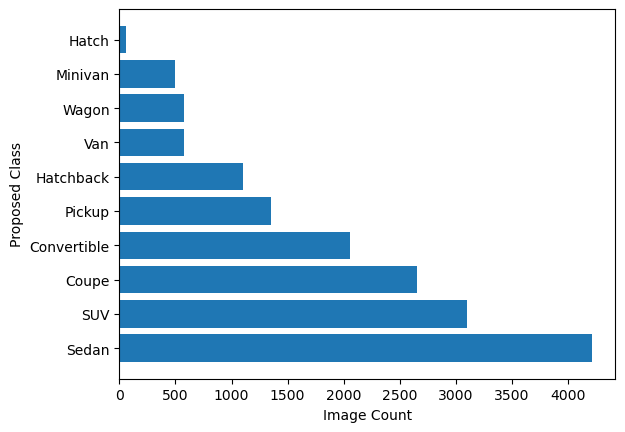

In [46]:
# Counts by Class
print(proposed_class_images['Class'].value_counts())

# Horizontal bar chart of counts by Class
plt.barh(proposed_class_images['Class'].value_counts().index, proposed_class_images['Class'].value_counts())
plt.xlabel('Image Count')
plt.ylabel('Proposed Class')
plt.savefig('../Output/Image_Counts_by_Proposed_Class.png', bbox_inches='tight')

## Sample Images for Top 5 Classes

In [47]:
top_5_classes = proposed_class_images['Class'].value_counts().head(5).index
# Sample 5 rows for each of the top 5 classes
top_5_classes_images = proposed_class_images[proposed_class_images['Class'].isin(top_5_classes)].groupby('Class').apply(lambda x: x.sample(5)).reset_index(drop=True)
top_5_classes_images

,Name,Class,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test,class_name,im_path,filename_only
0,BMW Z4 Convertible 2012,Convertible,3,116,475,341,38,0,BMW Z4 Convertible 2012,/Box/INFO 290T Project/Raw Data/Stanford Car D...,03044.jpg
1,Chevrolet Corvette Convertible 2012,Convertible,83,312,931,601,55,1,Chevrolet Corvette Convertible 2012,/Box/INFO 290T Project/Raw Data/Stanford Car D...,04454.jpg
2,Geo Metro Convertible 1993,Convertible,6,16,250,158,123,1,Geo Metro Convertible 1993,/Box/INFO 290T Project/Raw Data/Stanford Car D...,10158.jpg
3,Aston Martin V8 Vantage Convertible 2012,Convertible,826,511,1285,1084,8,1,Aston Martin V8 Vantage Convertible 2012,/Box/INFO 290T Project/Raw Data/Stanford Car D...,00637.jpg
4,Bentley Continental Supersports Conv. Converti...,Convertible,21,70,480,364,39,1,Bentley Continental Supersports Conv. Converti...,/Box/INFO 290T Project/Raw Data/Stanford Car D...,03166.jpg
5,Lamborghini Gallardo LP 570-4 Superleggera 2012,Coupe,59,61,474,221,152,1,Lamborghini Gallardo LP 570-4 Superleggera 2012,/Box/INFO 290T Project/Raw Data/Stanford Car D...,12488.jpg
6,Honda Accord Coupe 2012,Coupe,39,183,1007,686,128,0,Honda Accord Coupe 2012,/Box/INFO 290T Project/Raw Data/Stanford Car D...,10532.jpg
7,Plymouth Neon Coupe 1999,Coupe,48,120,589,371,172,0,Plymouth Neon Coupe 1999,/Box/INFO 290T Project/Raw Data/Stanford Car D...,14105.jpg
8,Chevrolet Corvette ZR1 2012,Coupe,38,35,250,145,56,0,Chevrolet Corvette ZR1 2012,/Box/INFO 290T Project/Raw Data/Stanford Car D...,04482.jpg
9,Mercedes-Benz SL-Class Coupe 2009,Coupe,30,36,452,237,163,0,Mercedes-Benz SL-Class Coupe 2009,/Box/INFO 290T Project/Raw Data/Stanford Car D...,13340.jpg


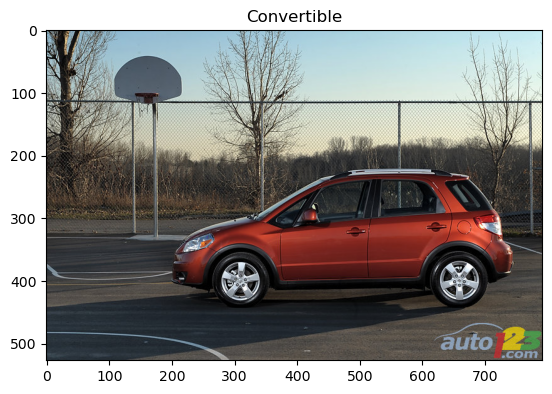

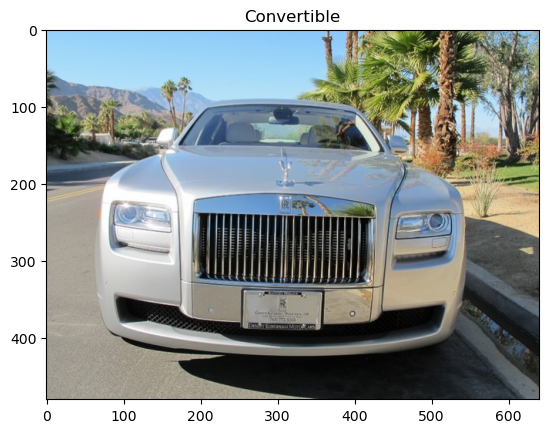

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\ijyli\anaconda3\envs\computervision\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ijyli\AppData\Local\Temp\ipykernel_8248\310859986.py", line 4, in <module>
    img = plt.imread(os.path.expanduser('~') + top_5_classes_images['im_path'].iloc[i])
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ijyli\anaconda3\envs\computervision\Lib\site-packages\matplotlib\pyplot.py", line 2389, in imread
    return matplotlib.image.imread(fname, format)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ijyli\anaconda3\envs\computervision\Lib\site-packages\matplotlib\image.py", line 1525, in imread
    with img_open(fname) as image:
         ^^^^^^^^^^^^^^^
  File "c:\Users\ijyli\anaconda3\envs\computervision\Lib\site-packages\PIL\Image.py", line 3218, in open
    fp = builtins.op

In [48]:
# Iterate over each of the top 5 classes
# Load and print images
for i in range(len(top_5_classes_images)):
    img = plt.imread(os.path.expanduser('~') + top_5_classes_images['im_path'].iloc[i])
    plt.imshow(img)
    plt.title(top_5_classes_images['Class'].iloc[i])
    # Make directory if not exists
    if not os.path.exists(f'../Output/Sample Images/{top_5_classes_images["Class"].iloc[i]}'):
        os.makedirs(f'../Output/Sample Images/{top_5_classes_images["Class"].iloc[i]}')
    plt.savefig(f'../Output/Sample Images/{top_5_classes_images["Class"].iloc[i]}/{top_5_classes_images["filename_only"].iloc[i]}', bbox_inches='tight')
    plt.show()